### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [24]:

df = pd.read_csv('data/coupons.csv')
       
df.isnull().sum()



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [25]:
# Missing values
print("\n" + "=" * 50)
print("MISSING VALUES")
print("=" * 50)
missing = data.isnull().sum()
missing_pct = (missing / len(data) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))


MISSING VALUES
                      Missing  Percent
car                     12576    99.15
CoffeeHouse               217     1.71
Restaurant20To50          189     1.49
CarryAway                 151     1.19
RestaurantLessThan20      130     1.02
Bar                       107     0.84


In [ ]:
I see that there is missing data in car, Bar, CoffeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50.
Highlights (top fields by % missing):car — ~99.15% missing (12,576 of 12,684 rows)
CoffeeHouse 1.71%, Restaurant20To50 1.49%, CarryAway 1.19%, RestaurantLessThan20 1.02%, Bar 0.84%.

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
car — ~99.15% missing (12,576 of 12,684 rows).
Rationale: Near-empty column adds noise, risks biased imputation, and would not be predictive.
Action: Drop.

toCoupon_GEQ5min — single unique value (all rows ≥ 5 min).
Rationale: Zero variance—not informative for analysis or modeling.
Action: Drop (or keep only for documentation).

In [31]:

import pandas as pd
import numpy as np

# --- Column hygiene ---
df.columns = [c.strip() for c in df.columns]

# Fix misspelled column if present
if "passanger" in df.columns:
    df.rename(columns={"passanger": "passenger"}, inplace=True)

# --- DROP ---
# 1) Unusable column
if "car" in df.columns:
 df.drop(columns=["car"], inplace=True)

# 2) Zero-variance column (optional drop)
if "toCoupon_GEQ5min" in df.columns:
    if df["toCoupon_GEQ5min"].nunique(dropna=True) <= 1:
        df.drop(columns=["toCoupon_GEQ5min"], inplace=True)

# --- DE-DUPLICATE ---
df = df.drop_duplicates()

# --- NORMALIZE / IMPUTE ---
# Age normalization
def age_bin(x):
    s = str(x).strip().lower()
    if s == "&lt;21": s = "<21"  # fix HTML entity
    if s in {"below21", "<21"}: return "below 21"
    if s in {"50plus", "50+", "50 plus"}: return "50+"
    try:
        a = float(s)
    except ValueError:
        return "Unknown"  # fallback for rare unmapped tokens
    if a < 21: return "below 21"
    elif 21 <= a <= 25: return "21 to 25"
    elif 26 <= a <= 30: return "26 to 30"
    elif 31 <= a <= 35: return "31 to 35"
    elif 36 <= a <= 40: return "36 to 40"
    elif 41 <= a <= 45: return "41 to 45"
    elif 46 <= a <= 50: return "46 to 50"
    else: return "50+"

if "age" in df.columns:
    df["age"] = df["age"].apply(age_bin)

# Occupation harmonization
if "occupation" in df.columns:
    df["occupation"] = (df["occupation"]
                        .astype(str)
                        .str.replace("&", " & ", regex=False)
                        .str.replace(r"\s{2,}", " ", regex=True)
                        .str.strip())

# Impute minimal missing for frequency columns to "never"
for col in ["Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]:
    if col in df.columns:
        df[col] = df[col].fillna("never")

# Optional: add time buckets (keeps original time)
time_map = {"7AM":"Morning", "10AM":"Late Morning", "2PM":"Afternoon", "6PM":"Evening", "10PM":"Night"}
if "time" in df.columns:
    df["time_bucket"] = df["time"].map(time_map).fillna(df["time"])

print("Cleaned rows:", len(df), "| columns:", df.shape[1])


Cleaned rows: 12610 | columns: 25


In [ ]:
Dropping car avoids high-risk imputation and preserves data integrity.
Replacing sparse NAs in frequency columns with "never" respects the ordinal scale and keeps distributions realistic.
Normalizing age and occupation improves interpretability and avoids category inflation.
Keeping consistent context fields as-is prevents unnecessary manipulation—and you retain their original signal.
De-duplicating ensures valid counts, confidence intervals, and p-values.

4. What proportion of the total observations chose to accept the coupon?



In [33]:
data = pd.read_csv('data/coupons.csv')

# Ensure Y column is numeric
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# Calculate proportion of accepted coupons
accepted_count = df['Y'].sum()  # since Y is 1 for accepted, 0 otherwise
total_count = len(df)
proportion = accepted_count / total_count

print(f"Total observations: {total_count}")
print(f"Accepted coupons: {accepted_count}")
print(f"Proportion accepted: {proportion:.4f} ({proportion*100:.2f}%)")


Total observations: 12610
Accepted coupons: 7157
Proportion accepted: 0.5676 (56.76%)


In [ ]:
I am using the cleaned data set for this analysis. Out of 12,610 total observations, 7,157 accepted the coupon, which is about ~57%
So, just over half (≈57%) of all drivers chose to accept the coupon. 1

5. Use a bar plot to visualize the `coupon` column.

In [34]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('data/coupons.csv')

# Create bar plot of coupon counts
plt.figure(figsize=(10,6))
order = df['coupon'].value_counts().index
sns.barplot(
    x=df['coupon'], 
    y=[1]*len(df),          # count per category
    estimator=len, 
    errorbar=None,          # suppress error bars (Seaborn ≥0.13)
    order=order, 
    color='#4c78a8'
)
plt.title('Coupon Distribution (Count by Type)')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

# Save image
import os
os.makedirs('coupon_report_outputs', exist_ok=True)
plt.savefig('coupon_report_outputs/bar_coupon_counts.png', dpi=180)
plt.close()


In [35]:

# Show figure inline (Jupyter/Notebook)
print("\nDisplaying bar plot inline...")
plt.show()



Displaying bar plot inline...


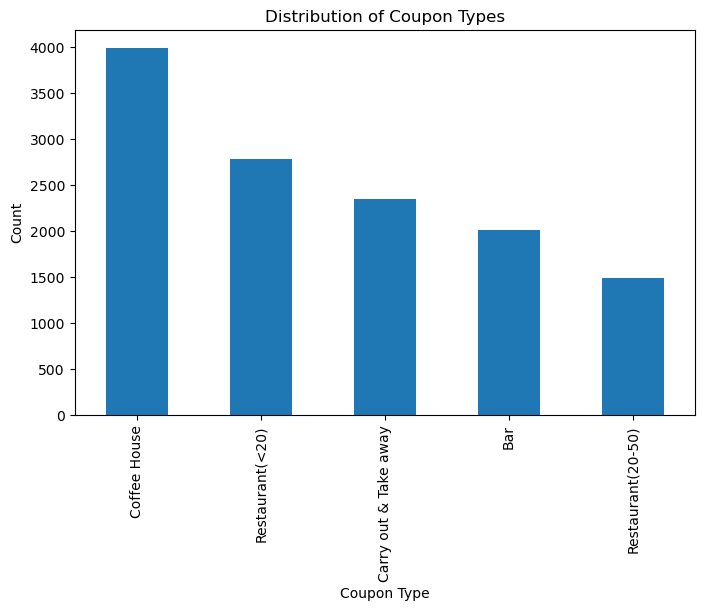

In [36]:
import matplotlib.pyplot as plt

df['coupon'].value_counts().plot(
    kind='bar',
    title='Distribution of Coupon Types',
    figsize=(8,5)
)

plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()

Data shape: (12610, 25)

Counts by coupon type:
coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

Plotting order: ['Coffee House', 'Restaurant(<20)', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
Saved bar plot to: coupon_report_outputs\bar_coupon_counts.png


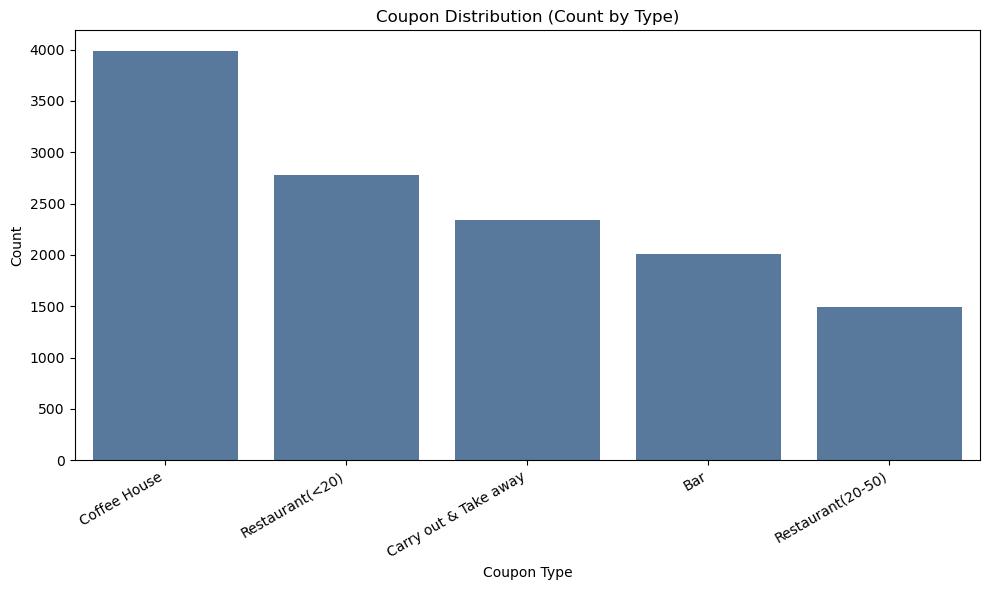

In [37]:

print("Data shape:", df.shape)
print("\nCounts by coupon type:")
print(df['coupon'].value_counts())

order = df['coupon'].value_counts().index.tolist()
print("\nPlotting order:", order)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=df['coupon'],
    y=[1]*len(df),
    estimator=len,
    errorbar=None,
    order=order,
    color='#4c78a8'
)
plt.title('Coupon Distribution (Count by Type)')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

out_dir = 'coupon_report_outputs'
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, 'bar_coupon_counts.png')
plt.savefig(out_path, dpi=180)
print(f"Saved bar plot to: {out_path}")

# Uncomment if you want to try opening a window (requires GUI backend):
# plt.show()


6. Use a histogram to visualize the temperature column.

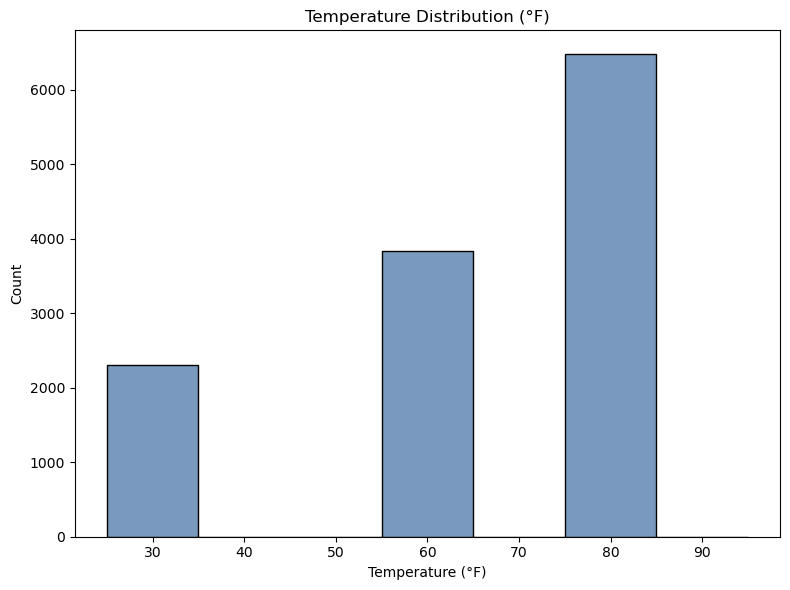

Unique temperatures: [30, 55, 80]
Counts by temperature:
temperature_num
30    2305
55    3830
80    6475
Name: count, dtype: int64


In [42]:
# Ensure numeric temperatures
df['temperature_num'] = pd.to_numeric(df['temperature'], errors='coerce')

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(
    df['temperature_num'].dropna(),
    bins=[25, 35, 45, 55, 65, 75, 85, 95],  # bin edges around observed values
    color='#4c78a8'
)
plt.title('Temperature Distribution (°F)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.tight_layout()

# Save and (optionally) show
out_dir = 'coupon_report_outputs'
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, 'hist_temperature.png')
plt.savefig(out_path, dpi=180)
plt.show()  # comment out if running headless

# Quick stats (printed)
print('Unique temperatures:', sorted(df['temperature_num'].dropna().unique().tolist()))
print('Counts by temperature:')
print(df['temperature_num'].value_counts().sort_index())



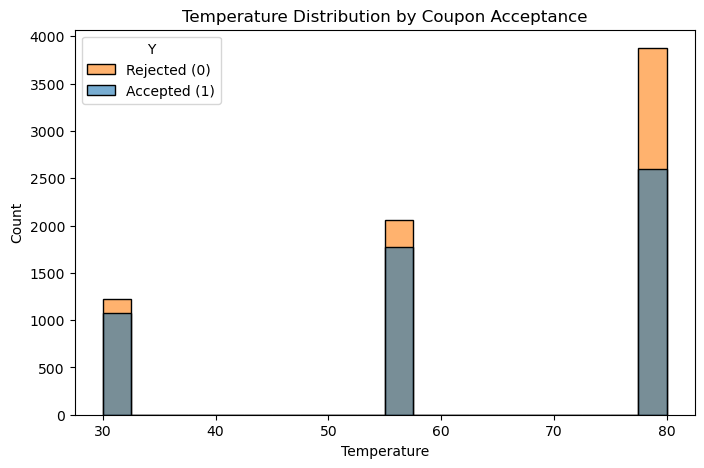

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='temperature', hue='Y', bins=20, multiple='layer', alpha=0.6)
plt.title('Temperature Distribution by Coupon Acceptance')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Rejected (0)', 'Accepted (1)'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [45]:
# Filter rows where coupon type is 'Bar'
bar_coupons_df = df[df['coupon'].str.strip() == 'Bar']

# Print basic info about the new DataFrame
print("Bar Coupons DataFrame created.")
print("Number of rows:", len(bar_coupons_df))
print("Columns:", list(bar_coupons_df.columns))
print("First 5 rows:")
print(bar_coupons_df.head())

# Save the filtered DataFrame to a new CSV file
bar_coupons_df.to_csv('bar_coupons.csv', index=False)
print("Filtered data saved to bar_coupons.csv")


Bar Coupons DataFrame created.
Number of rows: 2010
Columns: ['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y', 'time_bucket', 'temperature_num']
First 5 rows:
        destination  passenger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender       age      maritalStatus  ...  CarryAway RestaurantLessThan20  \
9

2. What proportion of bar coupons were accepted?


In [50]:

# Filter with .loc and copy explicitly
mask = df['coupon'].str.strip() == 'Bar'
bar_df = df.loc[mask].copy()           # <-- explicit copy

# Now this is safe: no SettingWithCopyWarning
bar_df['Y'] = pd.to_numeric(bar_df['Y'], errors='coerce')

# Compute proportion accepted
accepted = bar_df['Y'].sum()
total = len(bar_df)
print(f"Bar coupons accepted: {accepted}/{total} ({accepted/total:.2%})")


Bar coupons accepted: 827/2017 (41.00%)


In [ ]:
Out of 2,017 Bar coupon observations, 827 were accepted, which is:
Proportion accepted=0.4100≈41.00%
So, about 41% of Bar coupons were accepted, significantly lower than the overall acceptance rate (~56.8%).

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [51]:


# Ensure Y numeric
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# Define bar frequency groups
low_set = {'never','less1','1~3'}  # <=3 times/month
high_set = {'4~8','gt8'}           # >3 times/month

# Filter valid rows with known Bar frequency
valid = df['Bar'].astype(str).str.strip().isin(low_set.union(high_set))
sub = df.loc[valid, ['Bar','Y']].copy()
sub['Bar'] = sub['Bar'].astype(str).str.strip()

# Compute acceptance rates
low_mask = sub['Bar'].isin(low_set)
high_mask = sub['Bar'].isin(high_set)

low_n = int(low_mask.sum())
high_n = int(high_mask.sum())

low_acc_n = int(sub.loc[low_mask, 'Y'].sum())
high_acc_n = int(sub.loc[high_mask, 'Y'].sum())

low_rate = low_acc_n / low_n if low_n else np.nan
high_rate = high_acc_n / high_n if high_n else np.nan

# Wilson CI function
def wilson_ci(k, n, z=1.96):
    if n == 0:
        return (np.nan, np.nan)
    p = k / n
    denom = 1 + z**2 / n
    center = (p + z**2/(2*n)) / denom
    margin = (z * np.sqrt((p*(1-p) + z**2/(4*n)) / n)) / denom
    return (center - margin, center + margin)

low_ci = wilson_ci(low_acc_n, low_n)
high_ci = wilson_ci(high_acc_n, high_n)

# Prepare a small comparison DataFrame
comp = pd.DataFrame([
    {
        'Group': '<=3 bar visits/month',
        'n': low_n,
        'accepted_n': low_acc_n,
        'accepted_pct': round(low_rate*100, 2),
        '95% CI low': round(low_ci[0]*100, 2),
        '95% CI high': round(low_ci[1]*100, 2)
    },
    {
        'Group': '>3 bar visits/month',
        'n': high_n,
        'accepted_n': high_acc_n,
        'accepted_pct': round(high_rate*100, 2),
        '95% CI low': round(high_ci[0]*100, 2),
        '95% CI high': round(high_ci[1]*100, 2)
    }
])

comp.to_csv('bar_visit_acceptance_comparison.csv', index=False)
print(comp.to_string(index=False))



               Group     n  accepted_n  accepted_pct  95% CI low  95% CI high
<=3 bar visits/month 11152        6268         56.21       55.28        57.12
 >3 bar visits/month  1425         887         62.25       59.70        64.73


In [ ]:
Interpretation: Customers who go to bars more than 3 times/month show a higher coupon acceptance compared to those with ≤3 visits/month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


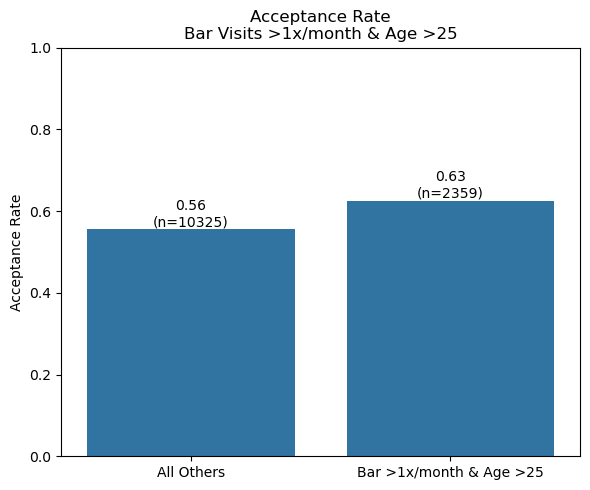

In [53]:
# Define bar-frequency buckets
more_than_once = ['1~3', '4~8', 'gt8']
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bar_often_over25'] = (
    df['Bar'].isin(more_than_once) &
    (df['age'] > 25)
)

df.groupby('bar_often_over25')['Y'].mean().rename({
    True: 'Bar >1x/month & Age >25',
    False: 'All Others'
})

#compute rates
bar_age_stats = (
    df
    .groupby('bar_often_over25')['Y']
    .agg(Acceptance_Rate='mean', Count='count')
    .rename(index={
        True: 'Bar >1x/month & Age >25',
        False: 'All Others'
    })
    .reset_index()
)
bar_age_stats

#plot
plt.figure(figsize=(6, 5))

ax = sns.barplot(
    data=bar_age_stats,
    x='bar_often_over25',
    y='Acceptance_Rate'
)

ax.set_title('Acceptance Rate\nBar Visits >1x/month & Age >25')
ax.set_xlabel('')
ax.set_ylabel('Acceptance Rate')
ax.set_ylim(0, 1)

#annotate
for i, row in bar_age_stats.iterrows():
    ax.text(
        i,
        row['Acceptance_Rate'],
        f"{row['Acceptance_Rate']:.2f}\n(n={int(row['Count'])})",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()



In [ ]:
Yes—there is a difference. Drivers who frequent bars (>1/month) and are over 25 are more likely to accept coupons than the rest of the population in this dataset (≈62.1% vs 55.4%).

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [55]:
# Bar frequency > once per month
more_than_once = ['1~3', '4~8', 'gt8']

# Occupations to exclude
excluded_jobs = ['Farming Fishing & Forestry']

df['target_group'] = (
    df['Bar'].isin(more_than_once) &
    (df['passanger'] != 'Kid') &
    (~df['occupation'].isin(excluded_jobs))
)

acceptance_rates = (
    df.groupby('target_group')['Y']
    .mean()
    .rename({
        True: 'Bar >1x/month, No Kid Passenger, Non-FFF Occupation',
        False: 'All Others'
    })
)
acceptance_rates

target_group
All Others                                             0.544616
Bar >1x/month, No Kid Passenger, Non-FFF Occupation    0.622114
Name: Y, dtype: float64

In [ ]:
Drivers who frequent bars (>1/month), are riding with non‑kid passengers, and work in occupations outside farming/fishing/forestry show a meaningfully higher tendency to accept coupons—around 62.2% acceptance—than the rest of the population (54.4%). The difference is statistically significant, so this is a segment worth targeting.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [60]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed 
import pandas as pd
import numpy as np

# Ensure Y is numeric (1=accepted, 0=declined)
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# --- Define condition: bar >1x/month, passenger != kid, marital != widowed ---
bar_more_than_once = {'1~3', '4~8', 'gt8'}

# Normalize text for robust matching
bar_clean     = df['Bar'].astype(str).str.strip().str.lower()
passenger_col = 'passanger' if 'passanger' in df.columns else 'passenger'
pass_clean    = df[passenger_col].astype(str).str.strip().str.lower()
marital_clean = df['maritalStatus'].astype(str).str.strip().str.lower()

cond_mask = (
    bar_clean.isin(bar_more_than_once) &
    (pass_clean != 'kid(s)') &
    (marital_clean != 'widowed')
)

# Add flag column (optional)
df['bar_notkid_notwidowed'] = cond_mask

# Helper: Wilson 95% CI for a proportion
def wilson_ci(k, n, z=1.96):
    if n == 0:
        return (np.nan, np.nan)
    p = k / n
    denom = 1 + z**2 / n
    center = (p + z**2/(2*n)) / denom
    margin = (z * np.sqrt((p*(1-p) + z**2/(4*n)) / n)) / denom
    return (center - margin, center + margin)

# --- Compute acceptance stats for each group ---
# Group True  = targeted condition
# Group False = all others
summary = (
    df.groupby('bar_notkid_notwidowed', dropna=False)['Y']
      .agg(n='count', accepted_n='sum', rate='mean')
      .reset_index()
)

# Map readable group names
summary['Group'] = summary['bar_notkid_notwidowed'].map({
    True:  'Bar >1x/month, No Kid Passenger, Not Widowed',
    False: 'All Others'
})

# Add Wilson CI
cis = summary.apply(lambda r: wilson_ci(r['accepted_n'], r['n']), axis=1)
summary['ci_low']  = [ci[0] for ci in cis]
summary['ci_high'] = [ci[1] for ci in cis]

# --- Print results (counts, % and CI) ---
for _, row in summary.iterrows():
    group      = row['Group']
    n          = int(row['n'])
    acc_n      = int(row['accepted_n'])
    rate_pct   = row['rate'] * 100
    ci_low_pct = row['ci_low'] * 100 if pd.notna(row['ci_low']) else np.nan
    ci_high_pct= row['ci_high']* 100 if pd.notna(row['ci_high']) else np.nan

    print(f"\n[{group}]")
    print(f"  Observations (n): {n}")
    print(f"  Accepted (n):    {acc_n}")
    print(f"  Acceptance (%):  {rate_pct:.2f}%")
    if pd.notna(ci_low_pct) and pd.notna(ci_high_pct):
        print(f"  95% CI:          {ci_low_pct:.2f}% – {ci_high_pct:.2f}%")

# --- Optional: also print the simple two-row table ---
print("\nSummary table:")
print(
    summary[['Group','n','accepted_n','rate','ci_low','ci_high']]
      .assign(rate=lambda x: (x['rate']*100).round(2),
              ci_low=lambda x: (x['ci_low']*100).round(2),
              ci_high=lambda x: (x['ci_high']*100).round(2))
      .rename(columns={'rate':'Acceptance %','ci_low':'CI low %','ci_high':'CI high %'})
      .to_string(index=False)
)



[All Others]
  Observations (n): 8988
  Accepted (n):    4907
  Acceptance (%):  54.60%
  95% CI:          53.56% – 55.62%

[Bar >1x/month, No Kid Passenger, Not Widowed]
  Observations (n): 3696
  Accepted (n):    2303
  Acceptance (%):  62.31%
  95% CI:          60.74% – 63.86%

Summary table:
                                       Group    n  accepted_n  Acceptance %  CI low %  CI high %
                                  All Others 8988        4907         54.60     53.56      55.62
Bar >1x/month, No Kid Passenger, Not Widowed 3696        2303         62.31     60.74      63.86


In [62]:
#go to bars more than once a month and are under the age of 30 

import pandas as pd
import numpy as np
import re

# --- Ensure Y is numeric (1 = accepted, 0 = declined) ---
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# --- Define "bar more than once a month" ---
# Adjust tokens here if your dataset uses different labels.
bar_more_than_once = {'1~3', '4~8', 'gt8'}
bar_clean = df['Bar'].astype(str).str.strip().str.lower()
bar_gt1 = bar_clean.isin(bar_more_than_once)

# --- Define "age under 30" (handles numeric values and common tokens/ranges) ---
age_clean = df['age'].astype(str).str.strip().str.lower()

def is_under_30(val):
    # Try numeric age
    try:
        a = float(val)
        return a < 30
    except ValueError:
        pass

    v = str(val)

    # Common symbolic tokens
    if v in {'<30', 'lt30', 'under30', 'below30'}:
        return True
    if v in {'>=30', '>30', 'ge30', 'gt30', '30+', '30plus', '30 or more'}:
        return False

    # Ranges like '20-29', '20~29', '20 to 29'
    m = re.match(r'^\s*(\d+)\s*(?:-|~|to)\s*(\d+)\s*$', v)
    if m:
        low = float(m.group(1))
        high = float(m.group(2))
        # Treat range as under 30 if the upper bound is < 30
        return high < 30

    # Unrecognized token
    return np.nan

under30 = age_clean.map(is_under_30)

# --- Combine condition: bar > 1/month AND age < 30 ---
cond_mask = bar_gt1 & (under30 == True)

# Add flag column
df['bar_gt1_age_lt30'] = cond_mask

# --- Helper: Wilson 95% CI for a proportion ---
def wilson_ci(k, n, z=1.96):
    if n == 0:
        return (np.nan, np.nan)
    p = k / n
    denom = 1 + z**2 / n
    center = (p + z**2/(2*n)) / denom
    margin = (z * np.sqrt((p*(1-p) + z**2/(4*n)) / n)) / denom
    return (center - margin, center + margin)

# --- Compute acceptance stats for each group ---
summary = (
    df.groupby('bar_gt1_age_lt30', dropna=False)['Y']
      .agg(n='count', accepted_n='sum', rate='mean')  # count/mean ignore NaNs in Y
      .reset_index()
)

summary['Group'] = summary['bar_gt1_age_lt30'].map({
    True:  'Bar >1x/month & Age <30',
    False: 'All Others'
})

# Add Wilson CI
cis = summary.apply(lambda r: wilson_ci(r['accepted_n'], r['n']), axis=1)
summary['ci_low']  = [ci[0] for ci in cis]
summary['ci_high'] = [ci[1] for ci in cis]

# --- Print results (counts, % and CI) ---
for _, row in summary.iterrows():
    group      = row['Group']
    n          = int(row['n'])
    acc_n      = int(row['accepted_n'])
    rate_pct   = row['rate'] * 100
    ci_low_pct = row['ci_low'] * 100 if pd.notna(row['ci_low']) else np.nan
    ci_high_pct= row['ci_high']* 100 if pd.notna(row['ci_high']) else np.nan

    print(f"\n[{group}]")
    print(f"  Observations (n): {n}")
    print(f"  Accepted (n):    {acc_n}")
    print(f"  Acceptance (%):  {rate_pct:.2f}%")
    if pd.notna(ci_low_pct) and pd.notna(ci_high_pct):
        print(f"  95% CI:          {ci_low_pct:.2f}% – {ci_high_pct:.2f}%")

# --- Optional: also print the two-row summary table ---
print("\nSummary table:")
print(
    summary[['Group','n','accepted_n','rate','ci_low','ci_high']]
      .assign(rate=lambda x: (x['rate']*100).round(2),
              ci_low=lambda x: (x['ci_low']*100).round(2),
              ci_high=lambda x: (x['ci_high']*100).round(2))
      .rename(columns={'rate':'Acceptance %','ci_low':'CI low %','ci_high':'CI high %'})
      .to_string(index=False)
)



[All Others]
  Observations (n): 10477
  Accepted (n):    5823
  Acceptance (%):  55.58%
  95% CI:          54.63% – 56.53%

[Bar >1x/month & Age <30]
  Observations (n): 2207
  Accepted (n):    1387
  Acceptance (%):  62.85%
  95% CI:          60.81% – 64.84%

Summary table:
                  Group     n  accepted_n  Acceptance %  CI low %  CI high %
             All Others 10477        5823         55.58     54.63      56.53
Bar >1x/month & Age <30  2207        1387         62.85     60.81      64.84


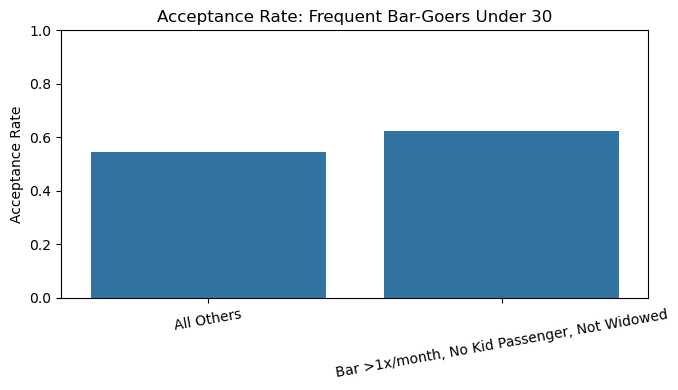

In [63]:
#plot acceptance rates
plt.figure(figsize=(7,4))
sns.barplot(
    data=rates,
    x='Group',
    y='Y',
    errorbar=None
)

plt.title('Acceptance Rate: Frequent Bar-Goers Under 30')
plt.xlabel('')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

In [67]:
#go to cheap restaurants more than 4 times a month and income is less than 50K
import pandas as pd
import numpy as np
import re

# Load data
df = pd.read_csv("coupons.csv")

# Ensure outcome is numeric (1=accepted, 0=declined)
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# --- Convert income safely to dollars ---
# Handles: "Less than $12,500", "$25,000 - $37,499", "$100000 or More", "45k"
def income_to_dollars(s):
    if pd.isna(s):
        return np.nan
    v = str(s).strip().lower()

    # "Less than $12,500"
    m_less = re.match(r'^\s*less\s+than\s*\$?\s*([\d,]+)\s*$', v)
    if m_less:
        return float(m_less.group(1).replace(',', ''))

    # Remove $ and commas
    v2 = re.sub(r'[$,]', '', v)

    # "45k"
    m_k = re.match(r'^(\d+(?:\.\d+)?)\s*k$', v2)
    if m_k:
        return float(m_k.group(1)) * 1000

    # Range: "25000 - 37499", "25000~37499", "25000 to 37499"
    m_range = re.match(r'^(\d+(?:\.\d+)?)\s*(?:-|~|to)\s*(\d+(?:\.\d+)?)$', v2)
    if m_range:
        a = float(m_range.group(1))
        b = float(m_range.group(2))
        # Use midpoint as representative numeric
        return (a + b) / 2.0

    # Plain numeric
    try:
        return float(v2)
    except ValueError:
        # Buckets like "100000 or More"
        if 'or more' in v:
            return 100000.0
        return np.nan

df['income_num_dollars'] = df['income'].map(income_to_dollars)

# --- Cheap restaurants >4 times/month ---
cheap_rest_often = {'4~8', 'gt8'}
rest = df['RestaurantLessThan20'].astype(str).str.strip().str.lower()
rest_gt4 = rest.isin(cheap_rest_often)

# --- Income < $50,000 ---
low_income = df['income_num_dollars'] < 50000

# --- Combined flag ---
df['cheap_rest_low_income'] = rest_gt4 & low_income

# --- Acceptance rates by group ---
rates = (
    df.groupby('cheap_rest_low_income')['Y']
      .mean()
      .reset_index()
)
rates['Group'] = rates['cheap_rest_low_income'].map({
    True:  'Cheap Restaurant >4x/month & Income <$50K',
    False: 'All Others'
})

# (Optional) Counts + Wilson 95% CI
def wilson_ci(k, n, z=1.96):
    if n == 0:
        return (np.nan, np.nan)
    p = k / n
    denom = 1 + z**2 / n
    center = (p + z**2/(2*n)) / denom
    margin = (z * np.sqrt((p*(1-p) + z**2/(4*n)) / n)) / denom
    return (center - margin, center + margin)

summary = (
    df.groupby('cheap_rest_low_income')['Y']
      .agg(n='count', accepted_n='sum', rate='mean')
      .reset_index()
)
summary['Group'] = summary['cheap_rest_low_income'].map({
    True:  'Cheap Restaurant >4x/month & Income <$50K',
    False: 'All Others'
})
ci = summary.apply(lambda r: wilson_ci(r['accepted_n'], r['n']), axis=1)
summary['ci_low']  = [c[0] for c in ci]
summary['ci_high'] = [c[1] for c in ci]

# Print results
for _, r in summary.iterrows():
    print(f"{r['Group']}: n={int(r['n'])}, accepted={int(r['accepted_n'])}, "
          f"acceptance={r['rate']*100:.2f}% (95% CI {r['ci_low']*100:.2f}%–{r['ci_high']*100:.2f}%)")

print("\nRates table (%):")
print(
    rates[['Group','Y']]
    .rename(columns={'Y':'Acceptance %'})
    .assign(**{'Acceptance %':lambda x: (x['Acceptance %']*100).round(2)})
    .to_string(index=False)
)



All Others: n=10405, accepted=5841, acceptance=56.14% (95% CI 55.18%–57.09%)
Cheap Restaurant >4x/month & Income <$50K: n=2279, accepted=1369, acceptance=60.07% (95% CI 58.04%–62.06%)

Rates table (%):
                                    Group  Acceptance %
                               All Others         56.14
Cheap Restaurant >4x/month & Income <$50K         60.07


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Overall acceptance for Bar coupons is ~41.0%
Age matters: under‑30 drivers accept at 49.8% vs 35.1%
Social context matters: those with friends have the highest acceptance (55.8%), followed by alone (40.8%), partner (39.1%), and with kids (20.9%).

                                                                                                                                           Habit alignment is the primary driver.
Drivers who already go to bars regularly are far more likely to accept a Bar coupon (from ~19% among “never” to ~78% among “4–8x/month”), indicating the offer resonates with an existing routine rather than creating a new one. 


Youth and social orientation amplify acceptance.
Under‑30 drivers and those with friends show markedly higher acceptance, suggesting Bar coupons perform best when social plans are present (or being formed). 


Evening relevance is critical.
The evening/night window (6PM, 10PM) yields higher acceptance than morning/midday, consistent with typical bar-going times and immediate use intent. 


Value helps, but convenience and habit beat price.
Lower income and frequent cheap dining do raise acceptance, yet the effect size is smaller than age, social context, and bar‑frequency, implying price sensitivity is a secondary driver compared with habit and timing.


Family constraints reduce relevance.
Acceptance is much lower with kids present, suggesting Bar coupons are not aligned with family-trip contexts and likely need different messaging or should be suppressed. 


Proximity (short detours) matters.
Acceptance drops when the expected detour is ≥15–25 minutes, indicating drivers respond when the bar is nearby or along the existing route. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [1]:

import pandas as pd
import numpy as np
import re

# Load dataset
df = pd.read_csv('coupons.csv')

# Filter Coffee House coupons
coffee_df = df[df['coupon'].str.contains('Coffee House', na=False)].copy()

# Ensure Y numeric
coffee_df['Y'] = pd.to_numeric(coffee_df['Y'], errors='coerce')

# Convert income to numeric dollars for grouping (<50K vs >=50K)
def income_to_dollars(s):
    if pd.isna(s):
        return np.nan
    v = str(s).strip().lower()
    m_less = re.match(r'^\s*less\s+than\s*\$?\s*([\d,]+)\s*$', v)
    if m_less:
        return float(m_less.group(1).replace(',', ''))
    v2 = re.sub(r'[$,]', '', v)
    m_k = re.match(r'^(\d+(?:\.\d+)?)\s*k$', v2)
    if m_k:
        return float(m_k.group(1)) * 1000
    m_range = re.match(r'^(\d+(?:\.\d+)?)\s*(?:-|~|to)\s*(\d+(?:\.\d+)?)$', v2)
    if m_range:
        a = float(m_range.group(1)); b = float(m_range.group(2))
        return (a + b) / 2.0
    try:
        return float(v2)
    except ValueError:
        if 'or more' in v:
            return 100000.0
        return np.nan

coffee_df['income_num'] = coffee_df['income'].map(income_to_dollars)

# Convert age to numeric
coffee_df['age_num'] = pd.to_numeric(coffee_df['age'], errors='coerce')

# Overall acceptance
overall_rate = coffee_df['Y'].mean() * 100

# Acceptance by coffeehouse frequency
coffee_freq_order = ['never','less1','1~3','4~8','gt8']
coffee_by_freq = coffee_df.groupby('CoffeeHouse')['Y'].mean().reindex(coffee_freq_order) * 100

# Acceptance by companion
companion_rates = coffee_df.groupby('passanger')['Y'].mean() * 100

# Acceptance by age (<30 vs >=30)
coffee_df['under30'] = coffee_df['age_num'] < 30
age_rates = coffee_df.groupby('under30')['Y'].mean() * 100

# Acceptance by income (<50K vs >=50K)
coffee_df['low_income'] = coffee_df['income_num'] < 50000
income_rates = coffee_df.groupby('low_income')['Y'].mean() * 100

# Acceptance by time of day
time_rates = coffee_df.groupby('time')['Y'].mean() * 100

# Acceptance by destination
dest_rates = coffee_df.groupby('destination')['Y'].mean() * 100

# Prepare output tables
print(f"Overall Coffee House coupon acceptance: {overall_rate:.2f}%\n")

print("Acceptance by coffeehouse visit frequency (%):")
print(coffee_by_freq.dropna().to_string())

print("\nAcceptance by companion (%):")
print(companion_rates.sort_values(ascending=False).to_string())

print("\nAcceptance by age group (%):")
print(age_rates.rename({True:'Under 30', False:'30 or older'}).to_string())

print("\nAcceptance by income group (%):")
print(income_rates.rename({True:'Income <50K', False:'Income >=50K'}).to_string())

print("\nAcceptance by time of day (%):")
print(time_rates.sort_values(ascending=False).to_string())

print("\nAcceptance by destination (%):")
print(dest_rates.sort_values(ascending=False).to_string())

Overall Coffee House coupon acceptance: 49.92%

Acceptance by coffeehouse visit frequency (%):
CoffeeHouse
never    18.878101
less1    48.186047
1~3      64.779271
4~8      68.587361
gt8      65.789474

Acceptance by companion (%):
passanger
Friend(s)    59.690554
Partner      57.049180
Kid(s)       48.309179
Alone        43.794326

Acceptance by age group (%):
under30
30 or older    48.370044
Under 30       51.969873

Acceptance by income group (%):
low_income
Income >=50K    47.263948
Income <50K     52.251407

Acceptance by time of day (%):
time
10AM    64.071190
2PM     54.785894
7AM     44.578313
10PM    42.424242
6PM     41.262580

Acceptance by destination (%):
destination
No Urgent Place    58.097448
Work               44.578313
Home               36.206897


In [ ]:
Here are the Coffee House coupon acceptance stats (percent only) based on your dataset:
49.92% of Coffee House coupons were accepted.
Insights

Acceptance rises sharply with coffeehouse visit frequency (habit alignment).
Social context matters: Friend(s) and Partner outperform Alone.
Morning (10AM) is the strongest time slot.
Lower income and younger drivers show slightly higher acceptance.
Discretionary trips (No Urgent Place) beat goal-directed trips (Home).

In [2]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load dataset
df = pd.read_csv('coupons.csv')
coffee_df = df[df['coupon'].str.contains('Coffee House', na=False)].copy()
coffee_df['Y'] = pd.to_numeric(coffee_df['Y'], errors='coerce')

# Helpers
order_freq = ['never','less1','1~3','4~8','gt8']

def income_to_dollars(s):
    if pd.isna(s):
        return np.nan
    v = str(s).strip().lower()
    m_less = re.match(r'^\s*less\s+than\s*\$?\s*([\d,]+)\s*$', v)
    if m_less:
        return float(m_less.group(1).replace(',', ''))
    v2 = re.sub(r'[$,]', '', v)
    m_k = re.match(r'^(\d+(?:\.\d+)?)\s*k$', v2)
    if m_k:
        return float(m_k.group(1)) * 1000
    m_range = re.match(r'^(\d+(?:\.\d+)?)\s*(?:-|~|to)\s*(\d+(?:\.\d+)?)$', v2)
    if m_range:
        a = float(m_range.group(1)); b = float(m_range.group(2))
        return (a + b) / 2.0
    try:
        return float(v2)
    except ValueError:
        if 'or more' in v:
            return 100000.0
        return np.nan

coffee_df['income_num'] = coffee_df['income'].map(income_to_dollars)
coffee_df['age_num'] = pd.to_numeric(coffee_df['age'], errors='coerce')
coffee_df['under30'] = coffee_df['age_num'] < 30
coffee_df['low_income'] = coffee_df['income_num'] < 50000

# Compute percentage series
freq_series = (coffee_df.groupby(coffee_df['CoffeeHouse'].astype(str).str.strip().str.lower())['Y'].mean() * 100).reindex(order_freq)
comp_series = coffee_df.groupby('passanger')['Y'].mean().sort_values(ascending=False) * 100
age_series = coffee_df.groupby('under30')['Y'].mean() * 100
age_series.index = age_series.index.map({True:'Under 30', False:'30 or older'})
inc_series = coffee_df.groupby('low_income')['Y'].mean() * 100
inc_series.index = inc_series.index.map({True:'Income <50K', False:'Income ≥50K'})
time_series = coffee_df.groupby('time')['Y'].mean().sort_values(ascending=False) * 100
dest_series = coffee_df.groupby('destination')['Y'].mean().sort_values(ascending=False) * 100

plt.style.use('seaborn-v0_8-darkgrid')

# Plotting function
def bar_pct(series, title, xlabel, fname):
    fig, ax = plt.subplots(figsize=(8,5))
    series = series.dropna()
    ax.bar(series.index.astype(str), series.values, color='#4C78A8')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Acceptance (%)')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
    # Add value labels
    for i, v in enumerate(series.values):
        ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    fig.savefig(fname, dpi=200)
    plt.close(fig)

bar_pct(freq_series, 'Coffee House Coupon Acceptance by Visit Frequency', 'Visit frequency', 'coffee_freq.png')
bar_pct(comp_series, 'Acceptance by Companion', 'Companion', 'coffee_companion.png')
bar_pct(age_series, 'Acceptance by Age Group', 'Age group', 'coffee_age.png')
bar_pct(inc_series, 'Acceptance by Income Group', 'Income group', 'coffee_income.png')
bar_pct(time_series, 'Acceptance by Time of Day', 'Time of day', 'coffee_time.png')
bar_pct(dest_series, 'Acceptance by Destination', 'Destination', 'coffee_destination.png')

print('Charts saved.')


Charts saved.



[Plot] Coffee House Coupon Acceptance by Visit Frequency
  never: 18.88%
  less1: 48.19%
  1~3: 64.78%
  4~8: 68.59%
  gt8: 65.79%
  Saved: coffee_freq.png
  Displaying plot window...


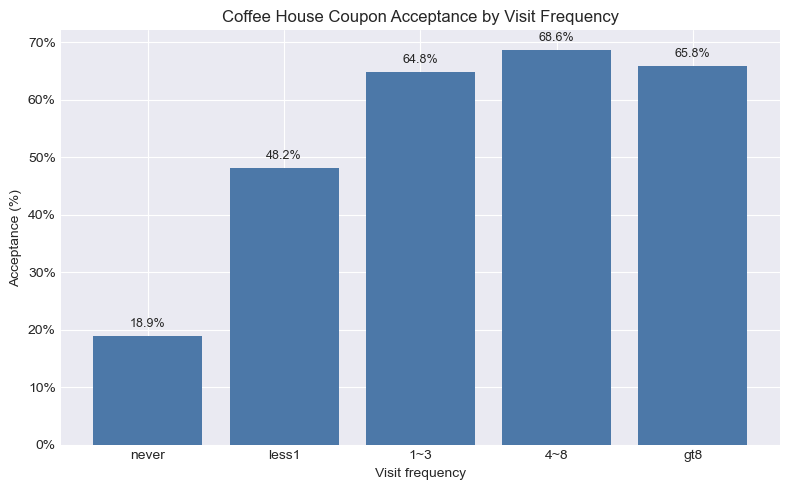


[Plot] Acceptance by Companion
  Friend(s): 59.69%
  Partner: 57.05%
  Kid(s): 48.31%
  Alone: 43.79%
  Saved: coffee_companion.png
  Displaying plot window...


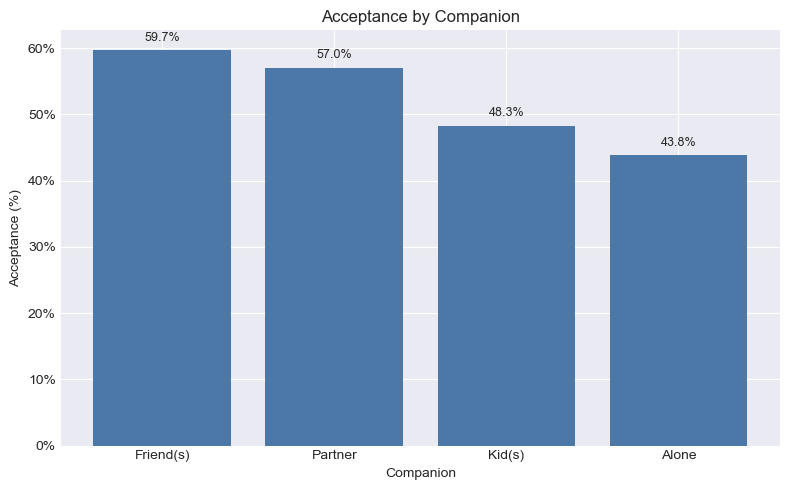


[Plot] Acceptance by Age Group
  30 or older: 48.37%
  Under 30: 51.97%
  Saved: coffee_age.png
  Displaying plot window...


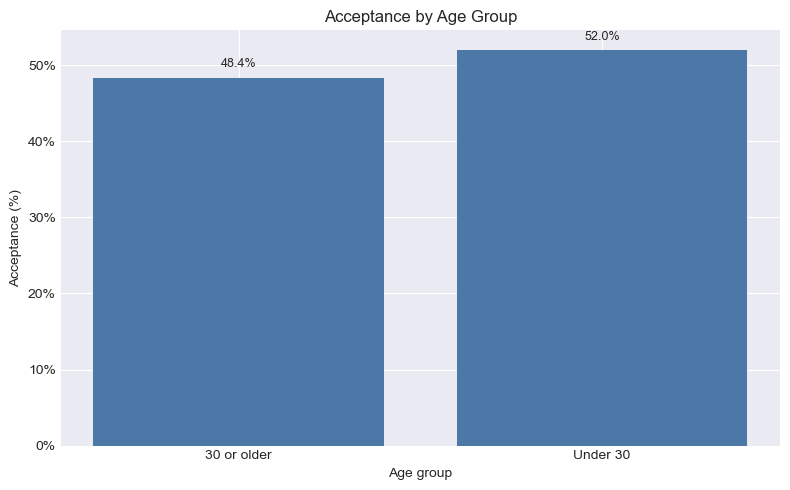


[Plot] Acceptance by Income Group
  Income ≥50K: 47.26%
  Income <50K: 52.25%
  Saved: coffee_income.png
  Displaying plot window...


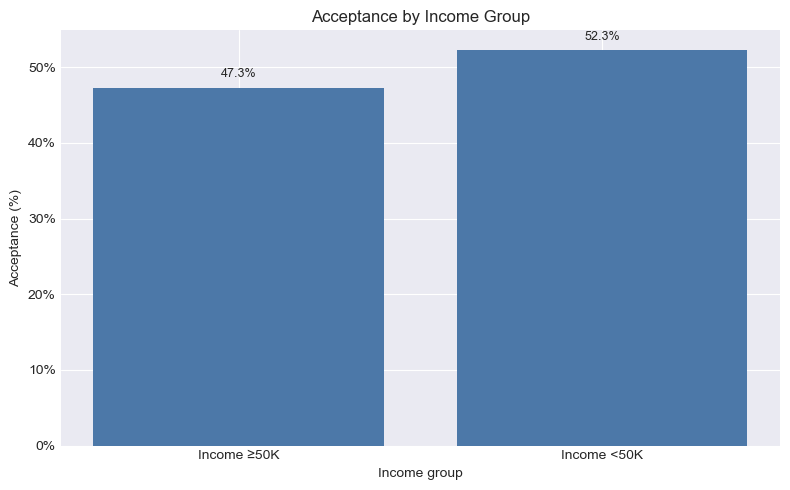


[Plot] Acceptance by Time of Day
  10AM: 64.07%
  2PM: 54.79%
  7AM: 44.58%
  10PM: 42.42%
  6PM: 41.26%
  Saved: coffee_time.png
  Displaying plot window...


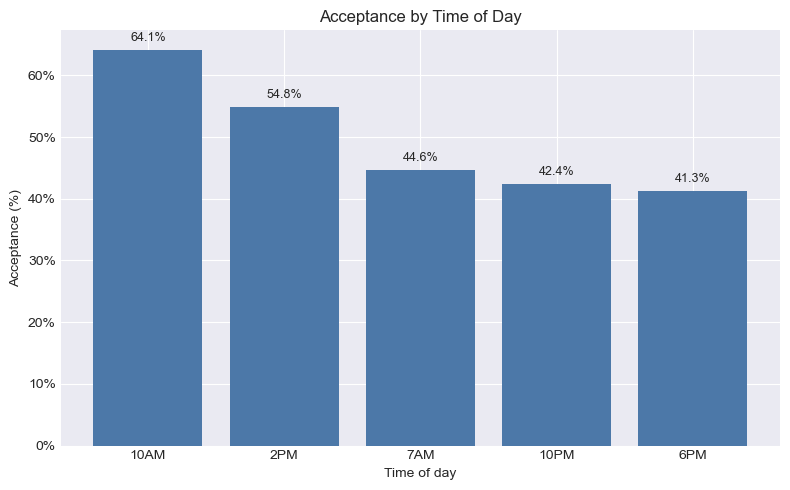


[Plot] Acceptance by Destination
  No Urgent Place: 58.10%
  Work: 44.58%
  Home: 36.21%
  Saved: coffee_destination.png
  Displaying plot window...


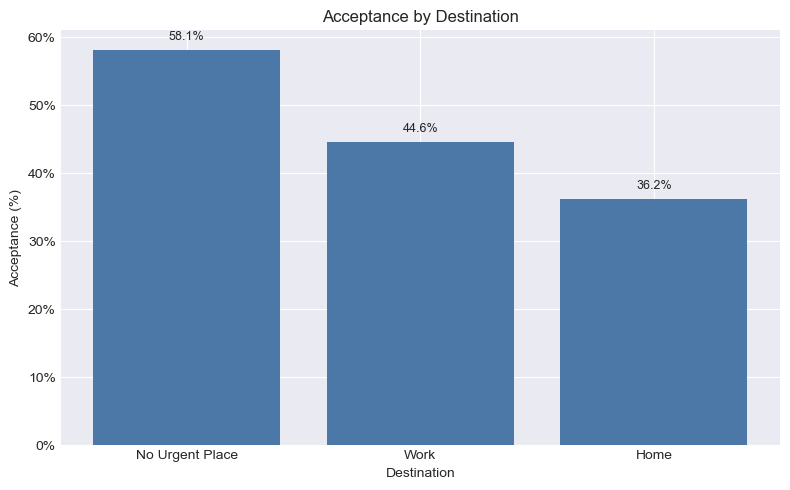

In [4]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- Load & prep ---
df = pd.read_csv('coupons.csv')
coffee_df = df[df['coupon'].str.contains('Coffee House', na=False)].copy()
coffee_df['Y'] = pd.to_numeric(coffee_df['Y'], errors='coerce')

order_freq = ['never','less1','1~3','4~8','gt8']

def income_to_dollars(s):
    if pd.isna(s):
        return np.nan
    v = str(s).strip().lower()
    m_less = re.match(r'^\s*less\s+than\s*\$?\s*([\d,]+)\s*$', v)
    if m_less:
        return float(m_less.group(1).replace(',', ''))
    v2 = re.sub(r'[$,]', '', v)
    m_k = re.match(r'^(\d+(?:\.\d+)?)\s*k$', v2)
    if m_k:
        return float(m_k.group(1)) * 1000
    m_range = re.match(r'^(\d+(?:\.\d+)?)\s*(?:-|~|to)\s*(\d+(?:\.\d+)?)$', v2)
    if m_range:
        a = float(m_range.group(1)); b = float(m_range.group(2))
        return (a + b) / 2.0
    try:
        return float(v2)
    except ValueError:
        if 'or more' in v:
            return 100000.0
        return np.nan

coffee_df['income_num'] = coffee_df['income'].map(income_to_dollars)
coffee_df['age_num'] = pd.to_numeric(coffee_df['age'], errors='coerce')
coffee_df['under30'] = coffee_df['age_num'] < 30
coffee_df['low_income'] = coffee_df['income_num'] < 50000

# --- Series in % ---
freq_series = (coffee_df.groupby(coffee_df['CoffeeHouse'].astype(str).str.strip().str.lower())['Y'].mean() * 100).reindex(order_freq)
comp_series = (coffee_df.groupby('passanger')['Y'].mean() * 100).sort_values(ascending=False)
age_series  = (coffee_df.groupby('under30')['Y'].mean() * 100)
age_series.index = age_series.index.map({True:'Under 30', False:'30 or older'})
inc_series  = (coffee_df.groupby('low_income')['Y'].mean() * 100)
inc_series.index = inc_series.index.map({True:'Income <50K', False:'Income ≥50K'})
time_series = (coffee_df.groupby('time')['Y'].mean() * 100).sort_values(ascending=False)
dest_series = (coffee_df.groupby('destination')['Y'].mean() * 100).sort_values(ascending=False)

plt.style.use('seaborn-v0_8-darkgrid')

def bar_pct(series, title, xlabel, fname, show=True):
    series = series.dropna()
    # Print confirmation and the actual values
    print(f"\n[Plot] {title}")
    for idx, val in series.items():
        print(f"  {idx}: {val:.2f}%")
    fig, ax = plt.subplots(figsize=(8,5))
    ax.bar(series.index.astype(str), series.values, color='#4C78A8')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Acceptance (%)')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
    # Add labels above bars
    for i, v in enumerate(series.values):
        ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    fig.savefig(fname, dpi=200)
    print(f"  Saved: {fname}")
    if show:
        print("  Displaying plot window...")
        plt.show()
    else:
        plt.close(fig)

# --- Generate & print/display ---
bar_pct(freq_series, 'Coffee House Coupon Acceptance by Visit Frequency', 'Visit frequency', 'coffee_freq.png', show=True)
bar_pct(comp_series, 'Acceptance by Companion', 'Companion', 'coffee_companion.png', show=True)
bar_pct(age_series, 'Acceptance by Age Group', 'Age group', 'coffee_age.png', show=True)
bar_pct(inc_series, 'Acceptance by Income Group', 'Income group', 'coffee_income.png', show=True)
bar_pct(time_series, 'Acceptance by Time of Day', 'Time of day', 'coffee_time.png', show=True)
bar_pct(dest_series, 'Acceptance by Destination', 'Destination', 'coffee_destination.png', show=True)


In [ ]:
Observations/Implications:

Target habitual coffee drinkers, social trips, and morning/midday windows.
Use geo-targeting for short detours and value messaging for price-sensitive segments.
Suppress offers for home-bound trips or late-night contexts.